In [2]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [3]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Finder vægter for de tre typer UGARCH modeller**

In [4]:
v_t_ARCH, out_of_sample_s_ARCH, in_sample_s_ARCH, Omega_t_ARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH,Omega_t_GARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR, out_of_sample_s_GJR, in_sample_s_GJR, Omega_t_GJR = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed
Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed
Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed
gjrGARCH11 detected


**Udregner performance**

In [5]:
res_ARCH, perf_table_ARCH = db.compare_strategies(v_t_ARCH, out_of_sample_s_ARCH,Omega_t_ARCH)
res_GARCH, perf_table_GARCH = db.compare_strategies(v_t_GARCH, out_of_sample_s_GARCH,Omega_t_GARCH)
res_GJR, perf_table_GJR = db.compare_strategies(v_t_GJR, out_of_sample_s_GJR,Omega_t_GJR)
print(v_t_GJR)


                 EEM       IVV       IEV       IXN       IYR       IXG  \
Date                                                                     
2017-10-12 -0.145403  0.528367 -0.034284 -0.094385 -0.049726 -0.065897   
2017-10-13 -0.139235  0.555755 -0.019257 -0.103026 -0.047378 -0.105793   
2017-10-16 -0.140244  0.586539 -0.013323 -0.112519 -0.046968 -0.117695   
2017-10-17 -0.133117  0.612251 -0.022907 -0.118142 -0.059109 -0.114511   
2017-10-18 -0.128013  0.626213 -0.028564 -0.117604 -0.057126 -0.112793   
...              ...       ...       ...       ...       ...       ...   
2021-09-27 -0.008530 -0.038120 -0.027620 -0.038975 -0.022357 -0.011568   
2021-09-28 -0.004997 -0.012467 -0.025697 -0.053902 -0.032813 -0.008488   
2021-09-29  0.013322 -0.091655 -0.052877 -0.050315  0.007483  0.033436   
2021-09-30  0.012195 -0.083226 -0.048804 -0.052357  0.002600  0.029091   
2021-10-01  0.011398 -0.091522 -0.038646 -0.041263 -0.003731  0.032858   

                 EXI      GC=F      B

**Sammensætter til en tabel**

In [6]:
#No trading cost first
perf_table=perf_table_ARCH.iloc[0:1,]
perf_table=perf_table.rename(index={'GARCH':'ARCH(1)'})
perf_table=perf_table.append(perf_table_GARCH.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[2,])
perf_table=perf_table.append(perf_table_GJR.iloc[4,])
perf_table=perf_table.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table=perf_table.append(perf_table_ARCH.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table=perf_table.append(perf_table_GARCH.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[3,])
perf_table=perf_table.append(perf_table_GJR.iloc[5,])
perf_table=perf_table.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table.to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &    Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &             7.640111e-02 &   8.723445e-02 &           1.141796 \\
GARCH(1,1)        &             6.093026e-02 &   6.366934e-02 &           1.044954 \\
GJR-GARCH(1,1)    &             6.424634e-02 &   6.149078e-02 &           0.957109 \\
Equal weight      &             1.565267e-01 &   1.173598e-01 &           0.749775 \\
Buy and hold      &             8.292341e-02 &   9.826798e-02 &           1.185045 \\
ARCH(1) TC        &            8.378165e+105 &  4.191179e+105 &           0.500250 \\
GARCH(1,1) TC     &             8.970623e-02 &  -1.344534e-01 &          -1.498819 \\
GJR-GARCH(1,1) TC &             1.059159e-01 &  -1.789963e-01 &          -1.689985 \\
Equal weight TC   &             1.565601e-01 &   1.134199e-01 &           0.724450 \\
Buy and hold TC   &             8.296388e-02 &   9.687292e-02 &           1.167652 \\
\bottomrule
\end{tabular}



**Laver en tabel af afkast**

In [7]:
res=res_ARCH.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res["GARCH(1,1)"]=res_GARCH["GARCH"]
res["GJR-GARCH(1,1)"]=res_GJR["GARCH"]
res["Equal weight"]=res_GJR["Equal_weight"]
res["Buy and hold"]=res_GJR["BnH"]
res["ARCH(1) TC"]=res_ARCH["GARCH TC"]
res["GARCH(1,1) TC"]=res_GARCH["GARCH TC"]
res["GJR-GARCH(1,1) TC"]=res_GJR["GARCH TC"]
res["Equal weight TC"]=res_GJR["Equal_weight TC"]
res["Buy and hold TC"]=res_GJR["BnH TC"]

In [8]:
res

,ARCH(1),"GARCH(1,1)","GJR-GARCH(1,1)",Equal weight,Buy and hold,ARCH(1) TC,"GARCH(1,1) TC","GJR-GARCH(1,1) TC",Equal weight TC,Buy and hold TC
Date,,,,,,,,,,
2017-10-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-10-13,1.001946,1.000576,1.000798,1.004879,1.001063,1.001810,1.000523,1.000729,1.004879,1.001063
2017-10-16,1.002313,1.001546,1.001740,1.005585,1.002122,1.001537,1.001440,1.001583,1.005584,1.002122
2017-10-17,1.003379,1.003144,1.003387,1.003397,1.003355,1.002530,1.003007,1.003196,1.003396,1.003355
2017-10-18,1.001942,1.001813,1.001917,1.004581,1.001654,1.001053,1.001649,1.001696,1.004581,1.001654
...,...,...,...,...,...,...,...,...,...,...
2021-09-27,1.401996,1.277654,1.265789,1.539849,1.469885,NaN,0.573598,0.477182,1.515763,1.461701
2021-09-28,1.394770,1.275283,1.262918,1.516980,1.453328,NaN,0.572512,0.476089,1.493247,1.445235
2021-09-29,1.396263,1.277973,1.265313,1.514932,1.457130,NaN,0.573679,0.476688,1.491216,1.449013


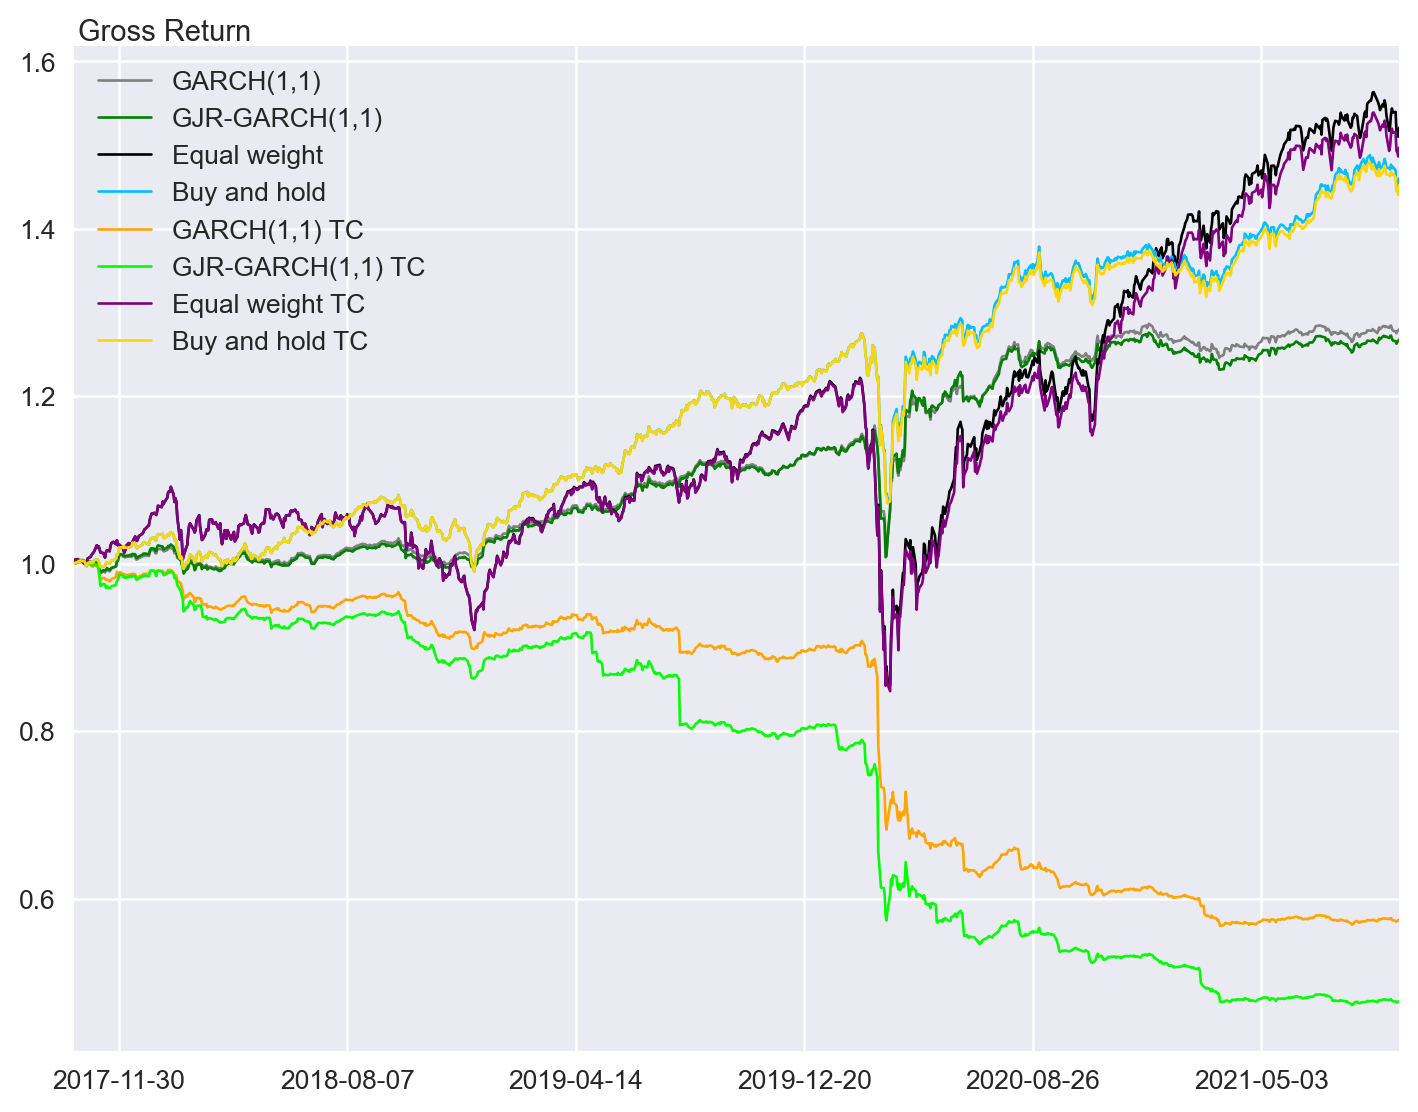

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res,label=res.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)


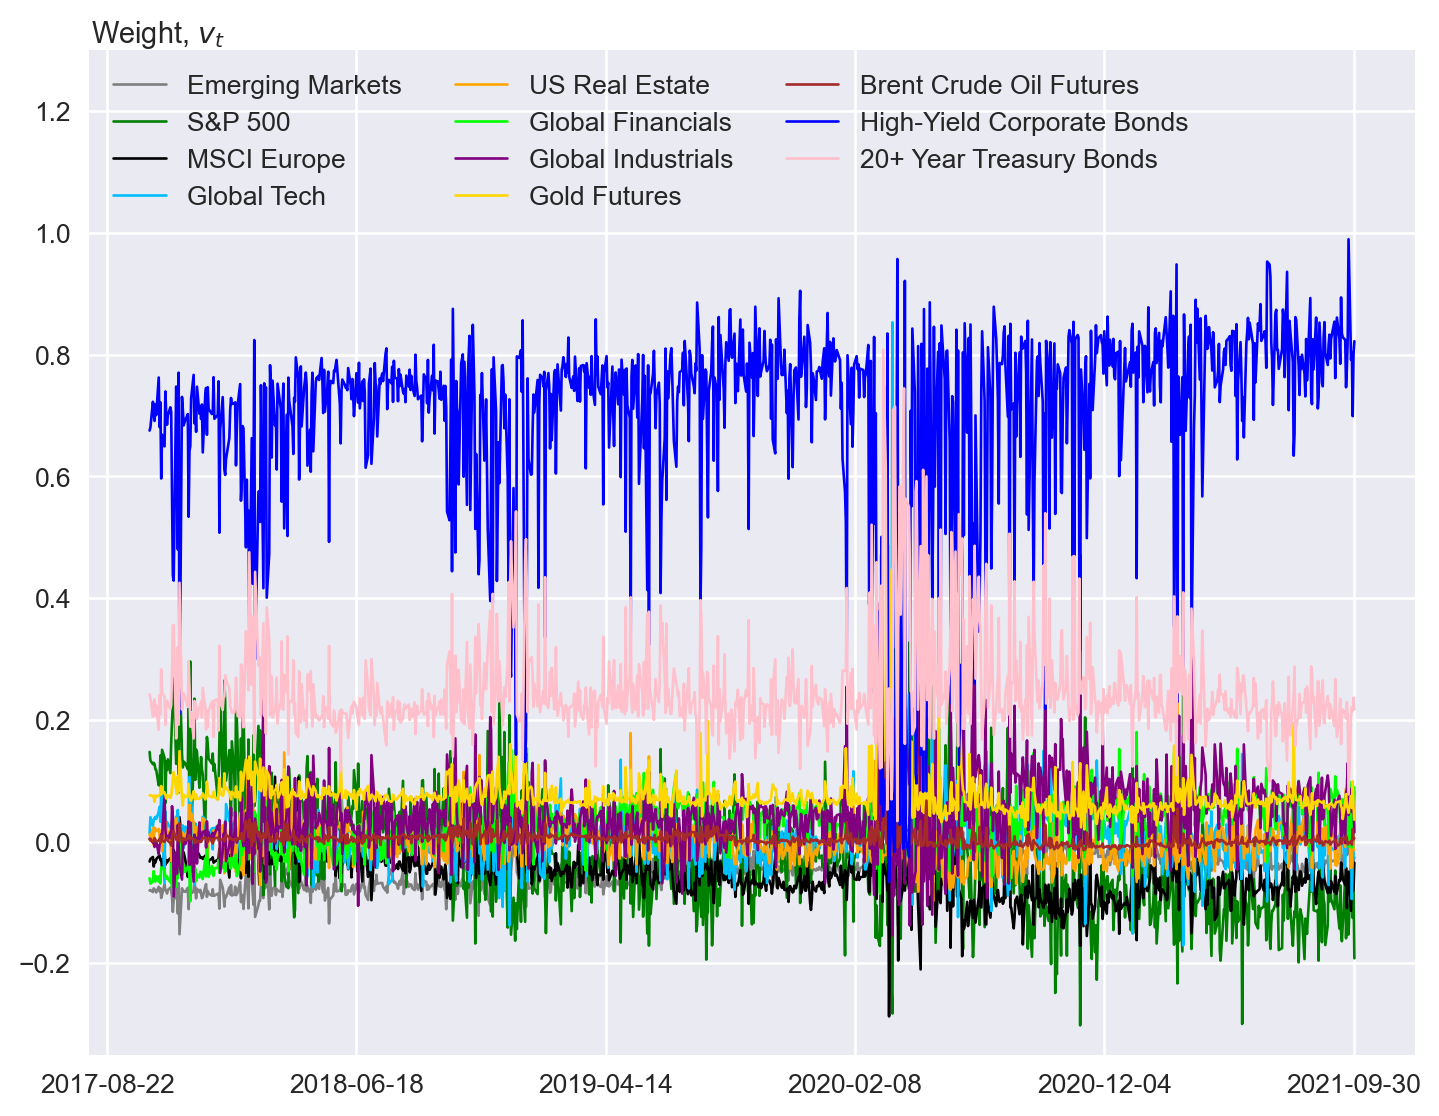

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\output\ARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

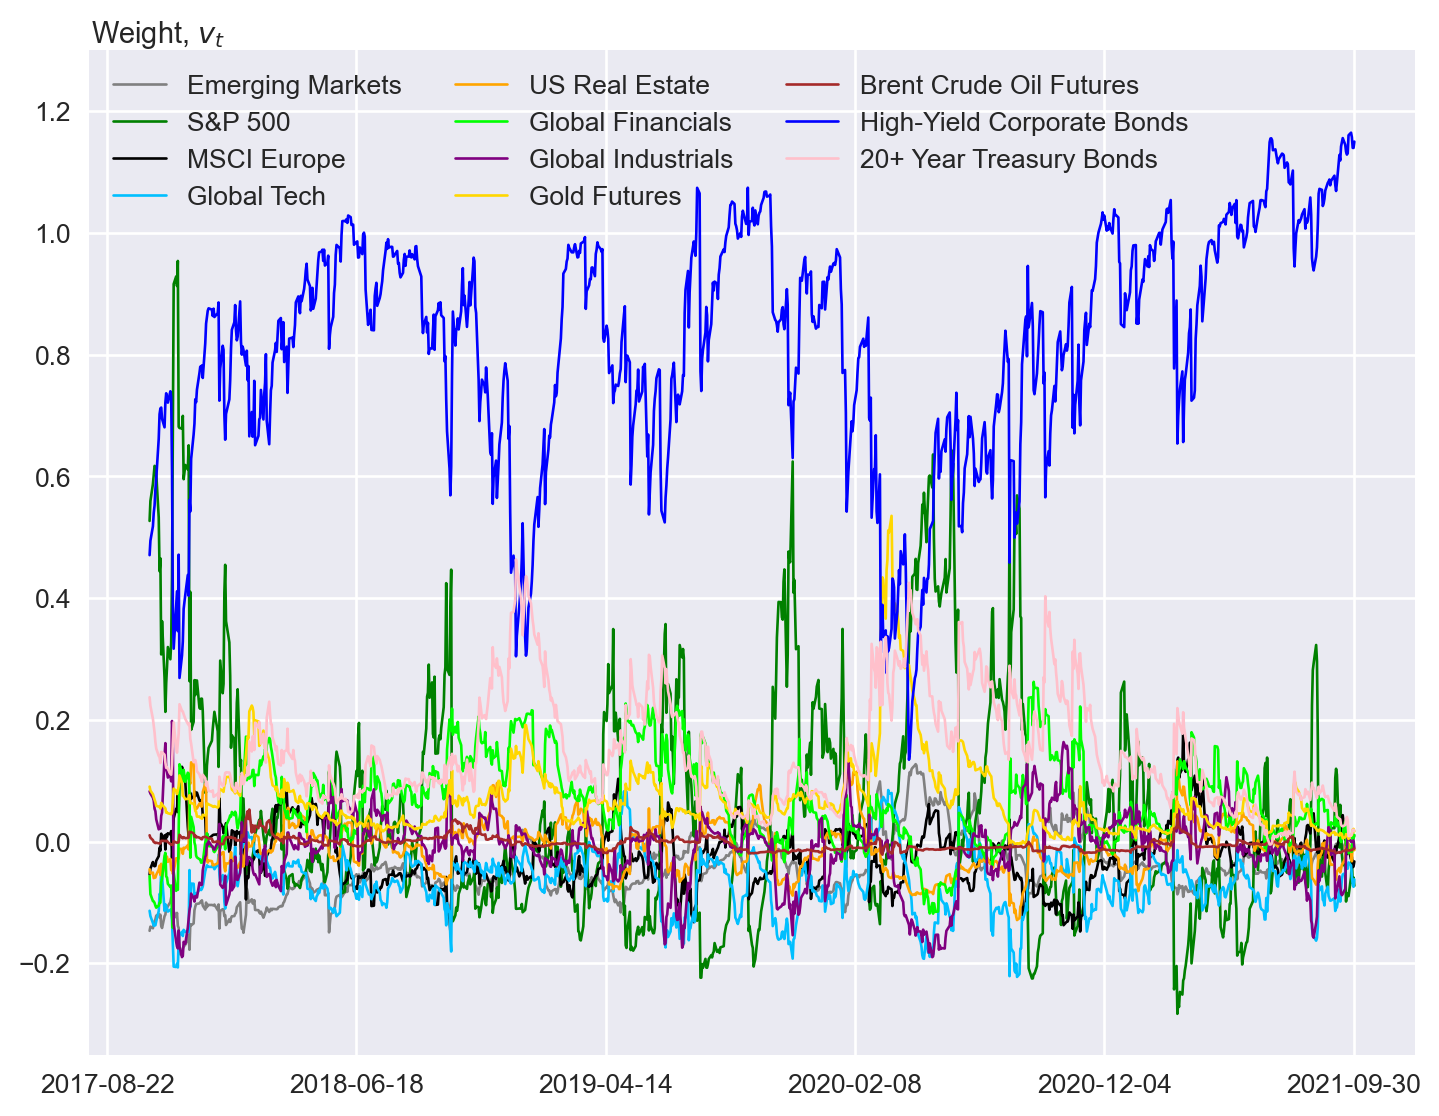

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\output\GARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

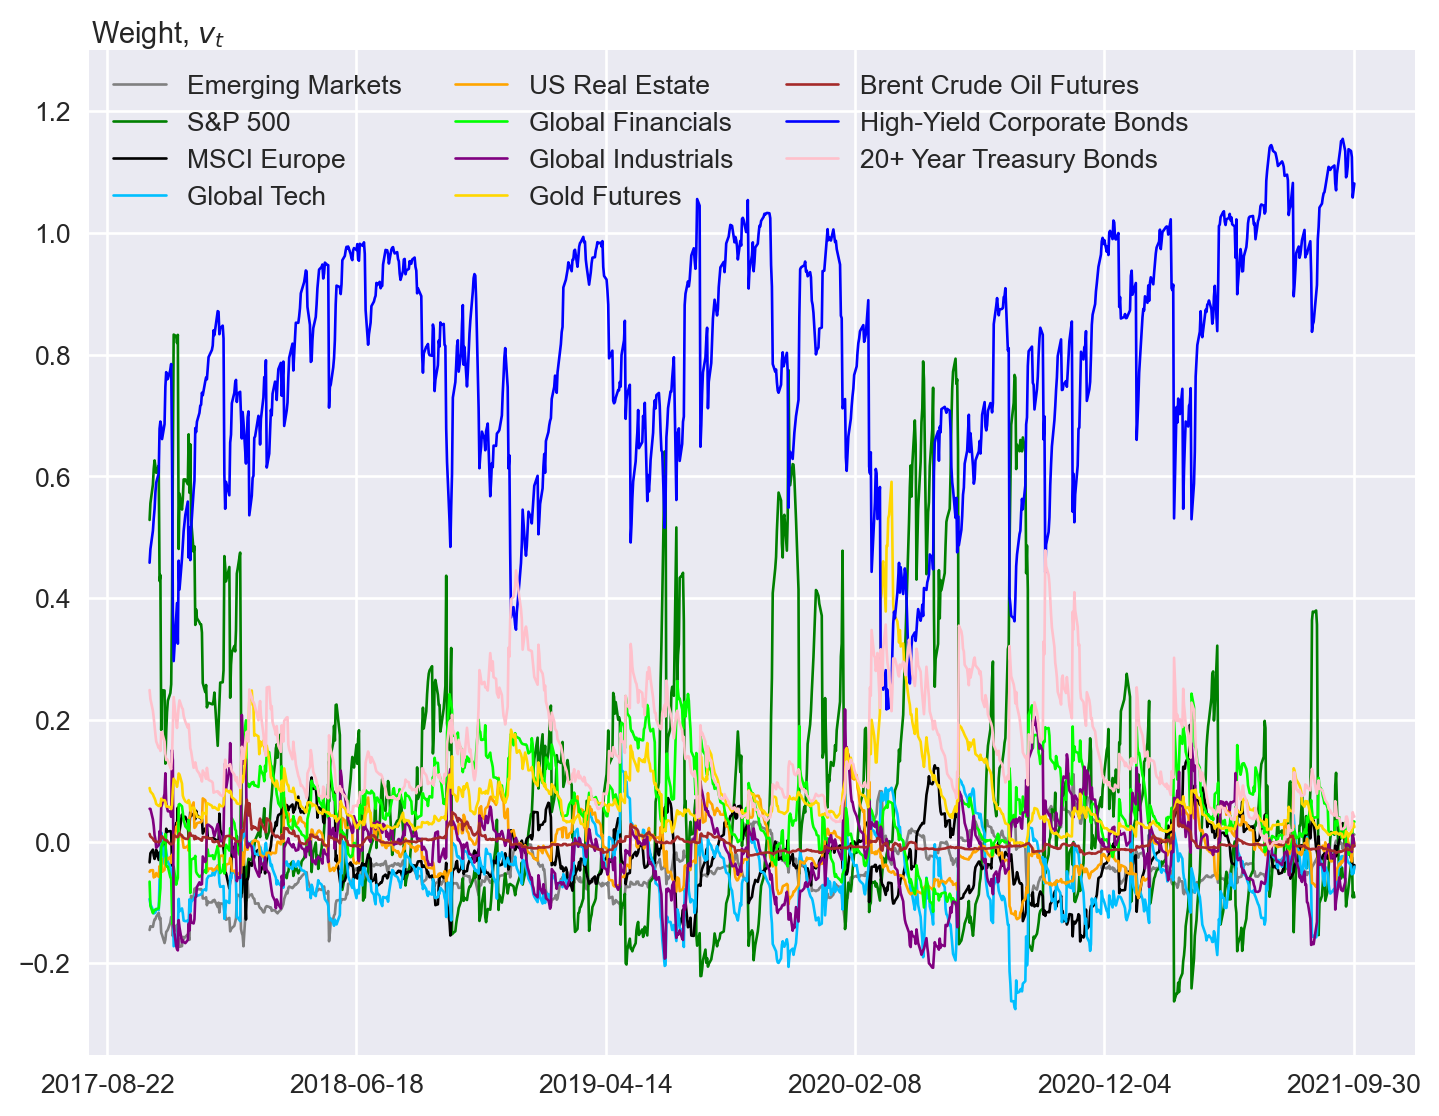

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)